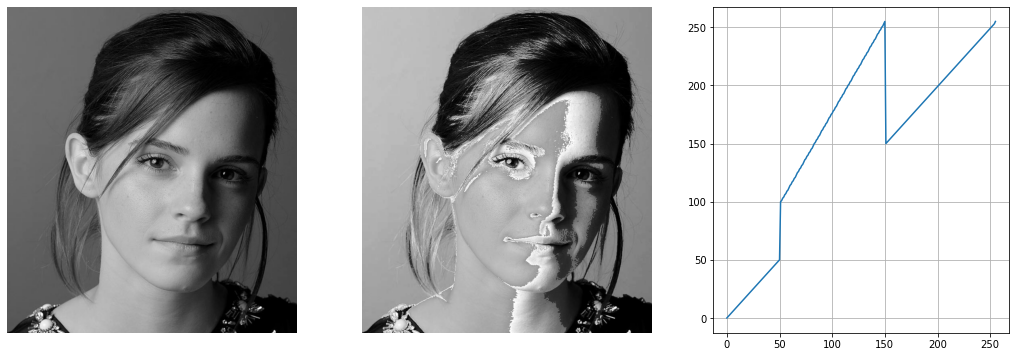

In [136]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\emma_gray.jpg",cv.IMREAD_COLOR)
assert img is not None

t1=np.linspace(0,50,51, endpoint=True)
t2 = np.linspace(50,100,0,endpoint=True)
t3 = np.linspace(100,255,100, endpoint=True)
t4 = np.linspace(255,150,0,endpoint=True)
t5 = np.linspace(150,255,105, endpoint=True)

t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
g= cv.LUT(img,t)

fig,ax = plt.subplots(1,3, figsize=(18,6))
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(g)
ax[1].axis('off')
ax[2].plot(t)
ax[2].grid()



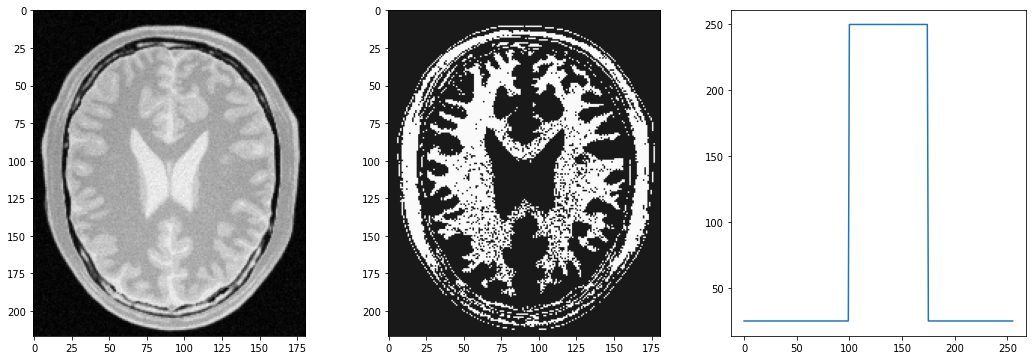

In [143]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\brain_proton_density_slice.png",cv.IMREAD_COLOR)
assert img is not None
t1 = np.linspace(0,25,0, endpoint=True)
t2=np.linspace(25,25,100, endpoint=True)
t3 = np.linspace(25,250,0,endpoint=True)
t4 = np.linspace(250,250,75, endpoint=True)
t5 = np.linspace(250,25,0,endpoint=True)
t6 = np.linspace(25,25,81, endpoint=True)
t7 = np.linspace(25,0,0, endpoint=True)


t = np.concatenate((t1,t2,t3,t4,t5,t6,t7), axis=0).astype(np.uint8)
g= cv.LUT(img,t)
fig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(img)
ax[1].imshow(g)
ax[2].plot(t)


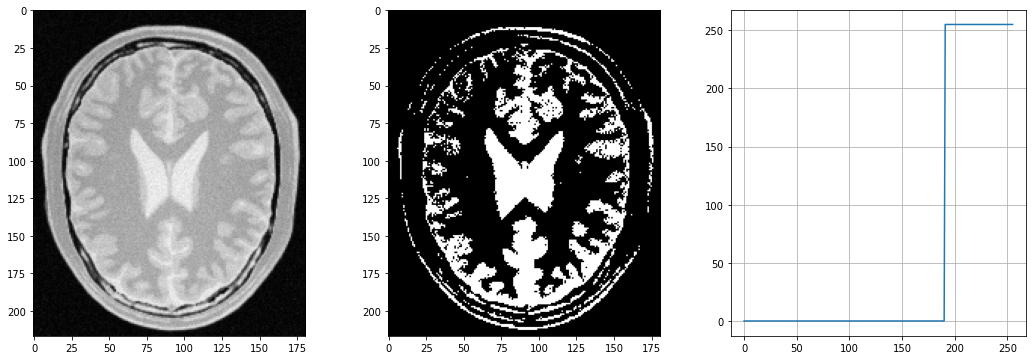

In [144]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\brain_proton_density_slice.png",cv.IMREAD_COLOR)
assert img is not None
t1 = np.linspace(0,0,191, endpoint=True)
t2=np.linspace(255,255,65, endpoint=True)
#t3 = np.linspace(250,250,50,endpoint=True)
#t4 = np.linspace(250,125,0, endpoint=True)
#t5 = np.linspace(125,255,131,endpoint=True)
t = np.concatenate((t1,t2), axis=0).astype(np.uint8)

plt.show()
g= cv.LUT(img,t)
fig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(img)
ax[1].imshow(g)
ax[2].plot(t)
ax[2].grid()

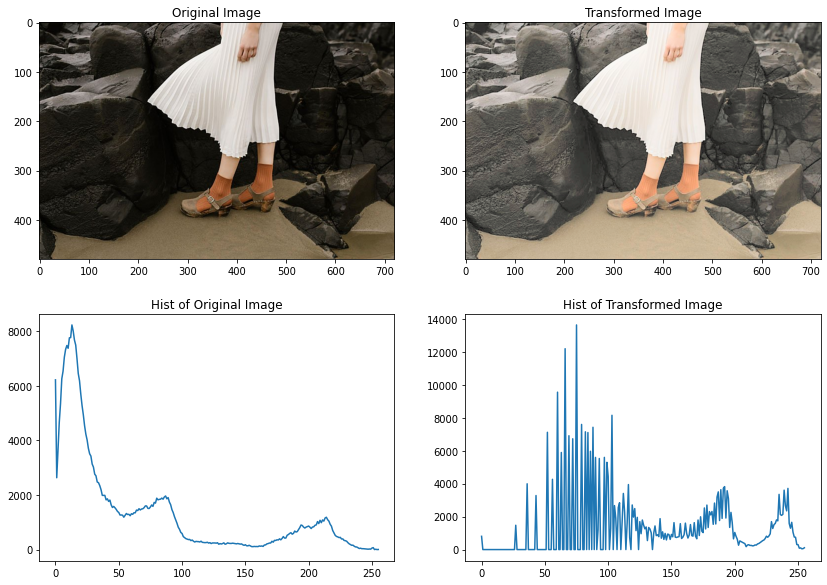

In [75]:
##### Question 3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\highlights_and_shadows.jpg")
Lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
(l,a,b) = cv.split(Lab)
gamma = 0.4

transform = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
L = cv.LUT(l, transform)
Lab[:,:,0] = L
Lab[:,:,1] = a
Lab[:,:,2] = b

hist_img = cv.calcHist([img],[0],None,[256],[0,256])
hist_Lab = cv.calcHist([Lab],[0],None,[256],[0,256])


fix, ax =plt.subplots(2,2, figsize=(14,10))
#ax[0].plot(transform)
ax[0,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,1].imshow(cv.cvtColor(Lab, cv.COLOR_Lab2RGB))
ax[0,1].set_title('Transformed Image')
ax[1,0].plot(hist_img)
ax[1,0].set_title('Hist of Original Image')
ax[1,1].plot(hist_Lab)
ax[1,1].set_title('Hist of Transformed Image')
plt.show()



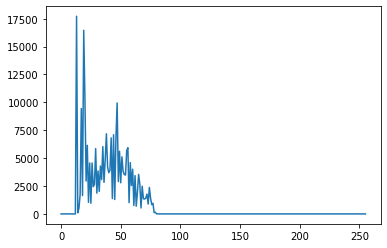

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\shells.png")
assert img is not None

hist_img = cv.calcHist([img],[0],None,[256],[0,256])

hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf = hist.cumsum()

fix, ax =plt.subplots(1,1, figsize=(6,4))
ax.plot(hist_img)

Text(0.5, 1.0, 'Histogram of the Equalized image')

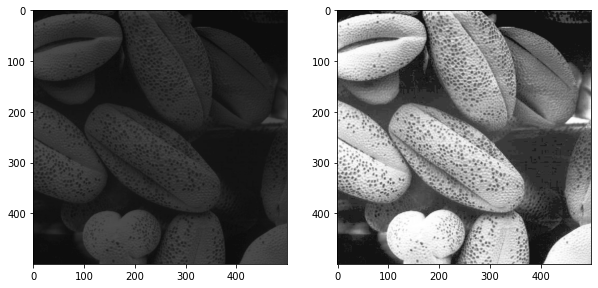

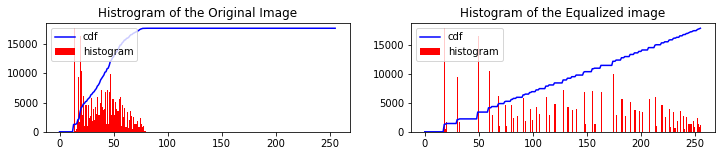

In [139]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = "D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\shells.png"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

equ = np.zeros((256,),dtype=np.float16)

height,width=img.shape
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf= hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()

for i in range(256):
    for j in range(i+1):
        equ[i]+=hist[j]/(height*width)
    equ[i]=round(equ[i]*255)
equ = equ.astype(np.uint8)

img2 = img.copy()
for i in range(width):
    for j in range(height):
        g = img2[j,i] 
        
        img2[j,i]=equ[g]

hist_e,bins_e= np.histogram(img2.ravel(),256,[0,256])
cdf_e= hist_e.cumsum()
cdf_normalized_e=cdf_e*hist_e.max()/cdf_e.max()

fig, ax = plt.subplots(1,2, figsize = (10,8))
ax[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))


fig, ax = plt.subplots(1,2, figsize = (12,2))
ax[0].plot(cdf_normalized, color='b')
ax[0].hist(img.flatten(),256,[0,256], color='r')

ax[0].legend(('cdf','histogram'),loc='upper left')
ax[0].set_title('Histrogram of the Original Image')


ax[1].plot(cdf_normalized_e, color='b')
ax[1].hist(img2.flatten(),256,[0,256], color='r')


ax[1].legend(('cdf','histogram'),loc='upper left')
ax[1].set_title('Histogram of the Equalized image')


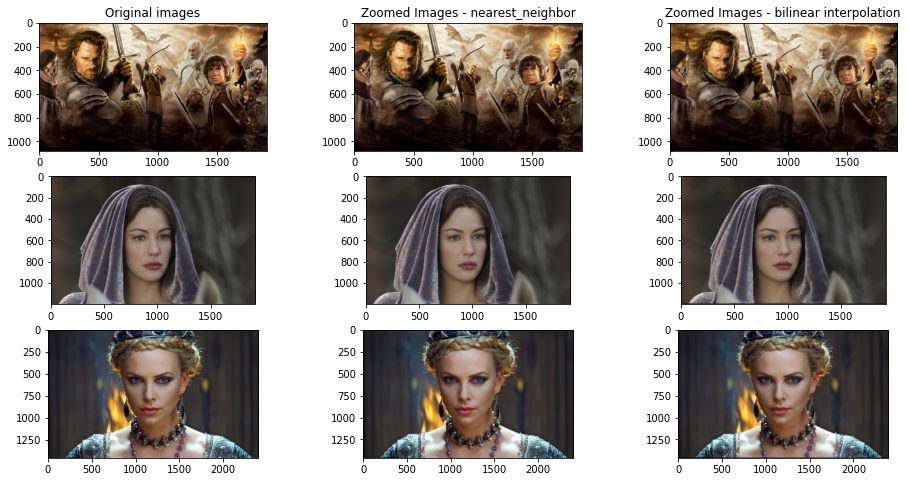

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def zoom(method,img, scale):
    if method =='nearest_neighbor':
        rows = scale*img.shape[0]
        cols = scale*img.shape[1]
        zoomed = np.zeros((rows,cols,3),dtype=img.dtype)
        for i in range(rows):
            for j in range(cols):
                n_i = round(i/scale)
                n_j = round(j/scale)

                if n_i>=img.shape[0]:
                    n_i=img.shape[0]-1
            
                if n_j>=img.shape[1]:
                    n_j=img.shape[1]-1
        
                zoomed[i,j]=img[n_i,n_j]
        return zoomed

    elif method == 'bilinear interpolation':
        rows = scale*img.shape[0]
        cols = scale*img.shape[1]
        zoomed = np.zeros((rows,cols,3),dtype=img.dtype)

        for i in range(rows):
            for j in range(cols):
                n_i = int(i/scale)
                n_j = int(j/scale)
                if n_i+1<= img.shape[0]-1 and n_j+1<= img.shape[1]-1:
                    zoomed[i,j]= (abs(n_i-i/scale)*img[n_i+1,n_j]+abs(n_i+1-i/scale)*img[n_i,n_j])*abs(n_j+1-j/scale) + (abs(n_i-i/scale)*img[n_i+1,n_j+1]+abs(n_i+1-i/scale)*img[n_i,n_j+1])*abs(n_j-j/scale)

                if n_i+1<= img.shape[0]-1 and n_j+1>= img.shape[1]-1:
                    zoomed[i,j]= (abs(n_i-i/scale)*img[n_i+1,n_j]+abs(n_i+1-i/scale)*img[n_i,n_j])*abs(n_j-j/scale) + (abs(n_i-i/scale)*img[n_i+1,n_j]+abs(n_i+1-i/scale)*img[n_i,n_j])*abs(n_j-j/scale)

                if n_i+1>= img.shape[0]-1 and n_j+1<= img.shape[1]-1:
                    zoomed[i,j]= (abs(n_i-i/scale)*img[n_i,n_j]+abs(n_i-i/scale)*img[n_i,n_j])*abs(n_j-j/scale) + (abs(n_i-i/scale)*img[n_i,n_j+1]+abs(n_i-i/scale)*img[n_i,n_j+1])*abs(n_j-j/scale)

                if n_i+1>= img.shape[0]-1 and n_j+1>= img.shape[1]-1:
                    zoomed[i,j]= (abs(n_i-i/scale)*img[n_i,n_j]+abs(n_i-i/scale)*img[n_i,n_j])*abs(n_j-j/scale) + (abs(n_i-i/scale)*img[n_i,n_j]+abs(n_i-i/scale)*img[n_i,n_j])*abs(n_j-j/scale)
        return zoomed

img1_O = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\a1q5images\a1q5images\im01.png')
img1_s = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\a1q5images\a1q5images\im01small.png')
img2_O = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\a1q5images\a1q5images\im02.png')
img2_s = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\a1q5images\a1q5images\im02small.png')
img3_O = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\a1q5images\a1q5images\im03.png')
img3_s = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\a1q5images\a1q5images\im03small.png')
fig,ax = plt.subplots(3,3, figsize=(16,8))
ax[0,0].imshow(cv.cvtColor(img1_O, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original images')
ax[0,1].imshow(cv.cvtColor(zoom('nearest_neighbor',img1_s,4), cv.COLOR_BGR2RGB))
ax[0,1].set_title('Zoomed Images - nearest_neighbor')
ax[0,2].imshow(cv.cvtColor(zoom('bilinear interpolation',img1_s,4), cv.COLOR_BGR2RGB))
ax[0,2].set_title('Zoomed Images - bilinear interpolation')

ax[1,0].imshow(cv.cvtColor(img2_O, cv.COLOR_BGR2RGB))
ax[1,1].imshow(cv.cvtColor(zoom('nearest_neighbor',img2_s,4), cv.COLOR_BGR2RGB))
ax[1,2].imshow(cv.cvtColor(zoom('bilinear interpolation',img2_s,4), cv.COLOR_BGR2RGB))

ax[2,0].imshow(cv.cvtColor(img3_O, cv.COLOR_BGR2RGB))
ax[2,1].imshow(cv.cvtColor(zoom('nearest_neighbor',img3_s,4), cv.COLOR_BGR2RGB))
ax[2,2].imshow(cv.cvtColor(zoom('bilinear interpolation',img3_s,4), cv.COLOR_BGR2RGB))


In [13]:
def ssd(A,B):
  dif = A.ravel().astype(int) - B.ravel().astype(int)
  return np.dot( dif, dif )/len(dif)

print(ssd(img1_O,zoom('nearest_neighbor',img1_s,4)))
print(ssd(img2_O,zoom('nearest_neighbor',img2_s,4)))
print(ssd(img1_O,zoom('bilinear interpolation',img1_s,4)))
print(ssd(img2_O,zoom('bilinear interpolation',img2_s,4)))
#print(ssd(img3_O,zoom('bilinear interpolation',img3_s,4)))
#print(ssd(img3_O,zoom('nearest_neighbor',img3_s,4)))

255.29569331918725
64.62937832754629
209.5425630144033
101.95257060185185


In [6]:
zoom('nearest_neighbor',img1_s,4).ravel()

array([ 44,  71, 108, ...,  16,  20,  35], dtype=uint8)

In [7]:
img1_O.ravel()

array([ 43,  70, 107, ...,  15,  20,  35], dtype=uint8)

([], [])

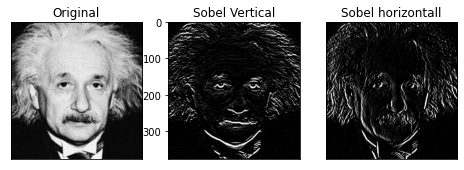

In [115]:
### Question 6
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
def sobel(type,img):
    if type=='vertical':
        kernel = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype='float')
        img_v = cv.filter2D(img,-1,kernel)
        return img_v

    elif type == 'horizontal':
        kernel = np.array([(-1,-0,1),(-2,0,2),(-1,0,1)], dtype='float')  
        img_v = cv.filter2D(img,-1,kernel)
        return img_v

    else:
        print("Invalid type")
        

img = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\einstein.png',cv.IMREAD_GRAYSCALE)
fig,ax = plt.subplots(1,3, figsize=(8,6))
ax[0].imshow(img,cmap='gray') 
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(sobel('vertical',img),cmap='gray') 
ax[1].set_title('Sobel Vertical')
ax[1].set_xticks([]), ax[2].set_yticks([])
ax[2].imshow(sobel('horizontal',img),cmap='gray') 
ax[2].set_title('Sobel horizontall')
ax[2].set_xticks([]), ax[2].set_yticks([])





([], [])

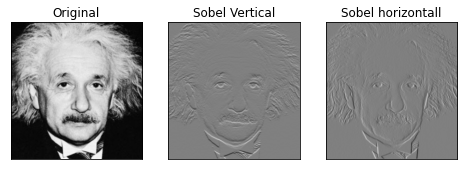

In [111]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def sobel(type,img):
    if type == 'vertical':
        kernel = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype='float')   
        rows, cols = img.shape

        img_v = np.zeros((rows,cols),dtype=float)
        for i in range(1,rows-1):
            for j in range(1,cols-1):
                img_array=np.array([(img[i-1,j-1],img[i-1,j],img[i-1,j+1]), (img[i,j-1],img[i,j],img[i,j+1]), (img[i+1,j-1],img[i+1,j],img[i+1,j+1])])
                img_v[i,j] = np.sum(np.multiply(img_array,kernel))
        return img_v
    elif type=='horizontal':
 
        kernel = np.array([(-1,-0,1),(-2,0,2),(-1,0,1)], dtype='float')  
        rows, cols = img.shape
        img_v = np.zeros((rows,cols),dtype=float) 
        for i in range(1,rows-1):
            for j in range(1,cols-1):
                img_array=np.array([(img[i-1,j-1],img[i-1,j],img[i-1,j+1]), (img[i,j-1],img[i,j],img[i,j+1]), (img[i+1,j-1],img[i+1,j],img[i+1,j+1])])
                img_v[i,j] = np.sum(np.multiply(img_array,kernel))

        return img_v  
    else:
        print("Invalid type")   

img = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\einstein.png',cv.IMREAD_GRAYSCALE)
fig,ax = plt.subplots(1,3, figsize=(8,6))
ax[0].imshow(img,cmap='gray') 
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(sobel('vertical',img),cmap='gray',vmin=-1020, vmax=1020) 
ax[1].set_title('Sobel Vertical')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(sobel('horizontal',img),cmap='gray',vmin=-1020, vmax=1020) 
ax[2].set_title('Sobel horizontall')
ax[2].set_xticks([]), ax[2].set_yticks([])

(-0.5, 363.5, 379.5, -0.5)

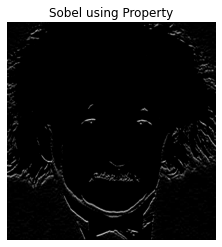

In [129]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\einstein.png',cv.IMREAD_GRAYSCALE)
kernel=np.array([[1],[2],[1]])
img_v = cv.filter2D(img,-1,kernel)
kernel2 = np.array([1,0,-1])
img_vv = cv.filter2D(img_v,-1,kernel2)
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.imshow(img_vv,cmap='gray')
ax.set_title('Sobel using Property')
ax.axis('off')

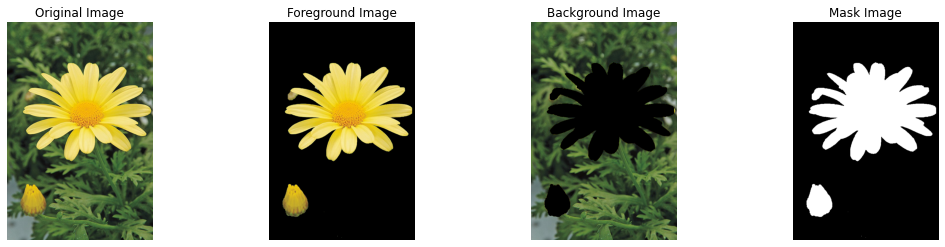

In [135]:
### Question 7

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\daisy.jpg')
img_c=img.copy()

mask = np.zeros(img_c.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,500,800)
cv.grabCut(img_c,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_c = img_c*mask2[:,:,np.newaxis]
bgdModel= cv.subtract(img,img_c)

fig,ax = plt.subplots(1,4 , figsize=(18,4))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(img_c,cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[2].imshow(cv.cvtColor(bgdModel,cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
ax[3].imshow(cv.cvtColor(mask2*255,cv.COLOR_BGR2RGB))
ax[3].set_title("Mask Image")
for i in range(4):
    ax[i].axis('off')





(-0.5, 560.5, 840.5, -0.5)

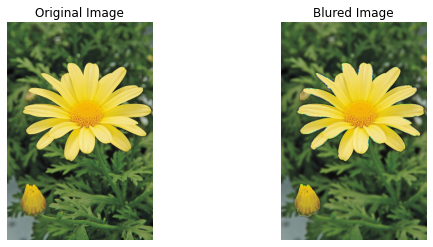

In [133]:
sigma = 4
blur = cv.GaussianBlur(bgdModel,(9,9),sigma)
img_enh = np.add(blur,img_c)

fig,ax = plt.subplots(1,2 , figsize=(9,4))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(img_enh,cv.COLOR_BGR2RGB))
ax[1].set_title("Blured Image")
ax[1].axis('off')